In [1]:
from numpy import mat
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('C:\\Users\\nidhi\\OneDrive\\Desktop\\Major_Project\\data.csv')

In [3]:
data["housing_price_range"] = pd.cut(data["house_value"],bins=[0,100000,200000,300000,400000,np.inf],labels=[0,1,2,3,4])
A=data.drop("housing_price_range",axis=1)
X=A.drop("house_value",axis=1)
y=data["housing_price_range"]

In [4]:
#y

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

In [6]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [7]:
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),
                          OneHotEncoder(handle_unknown="ignore"))

In [8]:
log_pipeline=make_pipeline(
   SimpleImputer(strategy="median"),
   FunctionTransformer(np.log),
   StandardScaler())

In [9]:
preprocessing_X=ColumnTransformer([
    ("log",log_pipeline,["total_bedrooms","total_rooms","population","households"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),
],
    remainder=num_pipeline)


In [10]:
housing_prepared=preprocessing_X.fit_transform(X)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
dfy=(to_categorical(y))

In [13]:
dfy

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing_prepared,dfy, stratify=y, test_size=0.2, random_state=42)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(128, kernel_initializer='he_uniform', activation='relu',input_dim=80))
#classifier.add(Dense(, kernel_initializer='he_uniform', activation='relu', input_shape=(11,)))
classifier.add(Dense(5, kernel_initializer='he_uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
dfX_train = pd.DataFrame(X_train.toarray())

In [17]:
type(dfX_train)

pandas.core.frame.DataFrame

In [18]:
#dfX_train

In [19]:
hist = classifier.fit(dfX_train, y_train, epochs=10, batch_size=10, validation_split=0.2)


Epoch 1/10
1321/1321 [==============================] - 4s 2ms/step - loss: 0.9306 - accuracy: 0.6190 - val_loss: 0.8046 - val_accuracy: 0.6561
Epoch 2/10
1321/1321 [==============================] - 3s 2ms/step - loss: 0.8028 - accuracy: 0.6695 - val_loss: 0.7716 - val_accuracy: 0.6757
Epoch 3/10
1321/1321 [==============================] - 3s 2ms/step - loss: 0.7749 - accuracy: 0.6768 - val_loss: 0.7531 - val_accuracy: 0.6791
Epoch 4/10
1321/1321 [==============================] - 2s 2ms/step - loss: 0.7605 - accuracy: 0.6851 - val_loss: 0.7528 - val_accuracy: 0.6836
Epoch 5/10
1321/1321 [==============================] - 2s 2ms/step - loss: 0.7465 - accuracy: 0.6902 - val_loss: 0.7359 - val_accuracy: 0.6866
Epoch 6/10
1321/1321 [==============================] - 2s 2ms/step - loss: 0.7375 - accuracy: 0.6948 - val_loss: 0.7380 - val_accuracy: 0.6897
Epoch 7/10
1321/1321 [==============================] - 2s 2ms/step - loss: 0.7291 - accuracy: 0.6931 - val_loss: 0.7297 - val_accuracy:

In [20]:
#dfy.to_csv("C:\\Users\\nidhi\\OneDrive\\Desktop\\Testing\\dfy.csv")

In [21]:
y_pred_class = classifier.predict(dfX_train)


516/516 [==============================] - 1s 2ms/step


In [22]:
#predict_x=model.predict(X_test) 
y_pred=np.argmax(y_pred_class,axis=1)

In [23]:
y_pred

array([1, 0, 0, ..., 3, 1, 1], dtype=int64)

In [24]:
y_train_class = np.argmax(y_train, axis=1)


In [25]:
#y_train

In [26]:
confusion_matrix(y_train_class,y_pred)

array([[2229,  669,   26,    1,    1],
       [ 450, 5461,  685,   12,   10],
       [  17, 1026, 2703,  107,   46],
       [   2,  147,  841,  420,  264],
       [   3,   57,  219,  182,  934]], dtype=int64)

In [27]:
y_train_class

array([1, 0, 0, ..., 3, 1, 1], dtype=int64)

In [28]:
accuracy_score(y_train_class,y_pred)

0.711421996124031

In [29]:
y_pred

array([1, 0, 0, ..., 3, 1, 1], dtype=int64)

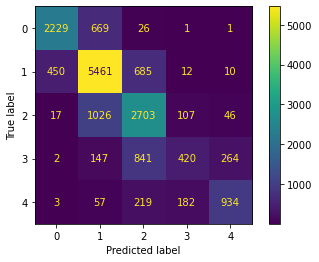

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train_class,y_pred)

In [31]:
dfX_test = pd.DataFrame(X_test.toarray())



In [32]:
type(dfX_test)


pandas.core.frame.DataFrame

In [33]:
y_pred_test = classifier.predict(dfX_test)


129/129 [==============================] - 0s 2ms/step


In [34]:
y_pred_test=np.argmax(y_pred_test,axis=1)


In [35]:
y_pred_test


array([1, 1, 2, ..., 2, 2, 0], dtype=int64)

In [36]:
y_test_class = np.argmax(y_test, axis=1)


In [37]:
#y_test


In [38]:
confusion_matrix(y_test_class,y_pred_test)


array([[ 524,  201,    6,    0,    1],
       [ 123, 1326,  203,    3,    0],
       [   2,  271,  649,   36,   16],
       [   0,   33,  227,  104,   54],
       [   0,   13,   53,   59,  224]], dtype=int64)

In [39]:
y_pred_test


array([1, 1, 2, ..., 2, 2, 0], dtype=int64)

In [40]:
y_test_class


array([1, 1, 2, ..., 2, 2, 0], dtype=int64)

In [41]:
accuracy_score(y_test_class,y_pred_test)


0.6848352713178295

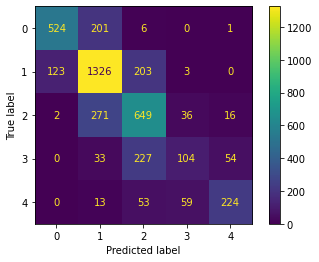

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test_class,y_pred_test)

In [43]:
accuracy_score(y_test_class,y_pred_test)

0.6848352713178295

In [44]:
y_pred_test

array([1, 1, 2, ..., 2, 2, 0], dtype=int64)

In [45]:
y_test_class

array([1, 1, 2, ..., 2, 2, 0], dtype=int64)

In [46]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

In [47]:
ann_train_f1 = f1_score(y_train_class, y_pred,average="weighted")
ann_train_precision_score =precision_score(y_train_class, y_pred,average='weighted')
ann_train_recall_score=recall_score(y_train_class, y_pred,average='weighted')
ann_train_accuracy = accuracy_score(y_train_class,y_pred)

ann_test_accuracy = accuracy_score(y_test_class,y_pred_test)
ann_test_f1 = f1_score(y_test_class, y_pred_test,average="weighted")
ann_test_precision_score = precision_score(y_test_class, y_pred_test,average='weighted')
ann_test_recall_score = recall_score(y_test_class, y_pred_test,average='weighted')

In [48]:
print("Model Performance on training Set")
print("ann_train_accuracy: %s" % ann_train_accuracy)
print("ann_train_f1: %s" % ann_train_f1)
print("ann_train_precision_score: %s" % ann_train_precision_score)
print("ann_train_recall_score: %s" % ann_train_recall_score)
print("Model Performance on test Set")
print("ann_test_accuracy: %s" % ann_test_accuracy)
print("ann_test_f1: %s" % ann_test_f1)
print("ann_test_precision_score: %s" % ann_test_precision_score)
print("ann_test_recall_score: %s" % ann_test_recall_score)


Model Performance on training Set
ann_train_accuracy: 0.711421996124031
ann_train_f1: 0.7011166342528635
ann_train_precision_score: 0.708134998642894
ann_train_recall_score: 0.711421996124031
Model Performance on test Set
ann_test_accuracy: 0.6848352713178295
ann_test_f1: 0.6762324830961942
ann_test_precision_score: 0.6823615239239029
ann_test_recall_score: 0.6848352713178295


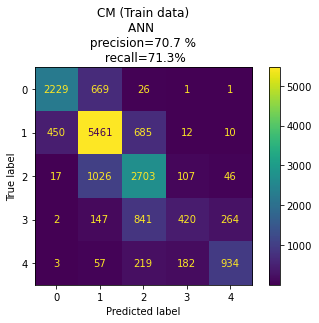

In [49]:
import seaborn as sns 
import pylab as pl
 
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_train_class,y_pred)
pl.title('CM (Train data)\nANN \n precision=70.7 % \n recall=71.3%')
pl.show()



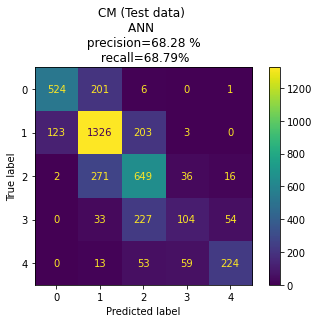

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test_class,y_pred_test)
pl.title('CM (Test data) \nANN \n precision=68.28 % \n recall=68.79%')
pl.show()

In [51]:
y_pred_test[1005:1015]

array([0, 4, 1, 1, 3, 4, 1, 2, 1, 4], dtype=int64)

In [52]:
y_test_class[1005:1015]

array([0, 4, 1, 2, 3, 4, 2, 2, 1, 3], dtype=int64)

In [53]:
y_pred[5005:5015]

array([2, 1, 1, 1, 1, 2, 4, 4, 1, 1], dtype=int64)

In [54]:
y_train_class[5005:5015]

array([3, 1, 1, 1, 1, 4, 4, 2, 1, 1], dtype=int64)